****Market Microstructure Analysis**** *(Self-Project)*

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Example: Load sample data (replace with actual high-frequency TAQ data)
# Assuming `data` is a DataFrame with columns: 'timestamp', 'price', 'volume', 'bid_price', 'ask_price'
data = pd.read_csv('high_frequency_data.csv', parse_dates=['timestamp'])

# Sort data by timestamp
data.sort_values('timestamp', inplace=True)

# Calculate Mid Price
data['mid_price'] = (data['bid_price'] + data['ask_price']) / 2

# Calculate Bid-Ask Spread
data['spread'] = data['ask_price'] - data['bid_price']

# Calculate Order Flow Imbalance (OFI)
data['ofi'] = data['volume'].diff() * np.sign(data['price'].diff())

# Remove NaN values after differencing
data.dropna(inplace=True)

print(data.head())

            timestamp       price  volume   bid_price   ask_price   mid_price  \
1 2023-07-01 09:30:01  100.035845      53  100.028785  100.042905  100.035845   
2 2023-07-01 09:30:02  100.100614      67  100.094178  100.107050  100.100614   
3 2023-07-01 09:30:03  100.252917      91  100.246031  100.259802  100.252917   
4 2023-07-01 09:30:04  100.229501      66  100.212844  100.246159  100.229501   
5 2023-07-01 09:30:05  100.206088      64  100.200055  100.212121  100.206088   

     spread   ofi  
1  0.014121  14.0  
2  0.012872  14.0  
3  0.013771  24.0  
4  0.033315  25.0  
5  0.012066   2.0  


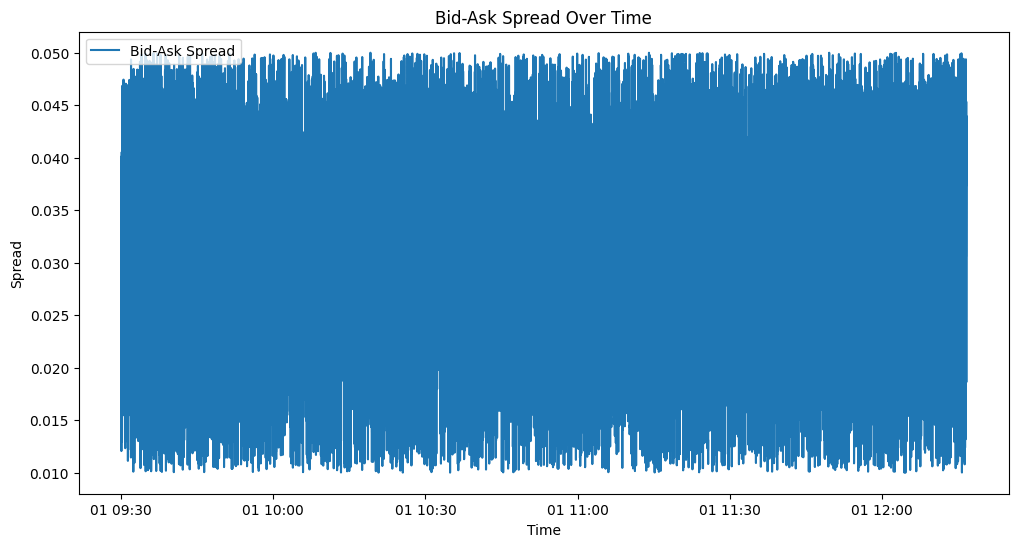

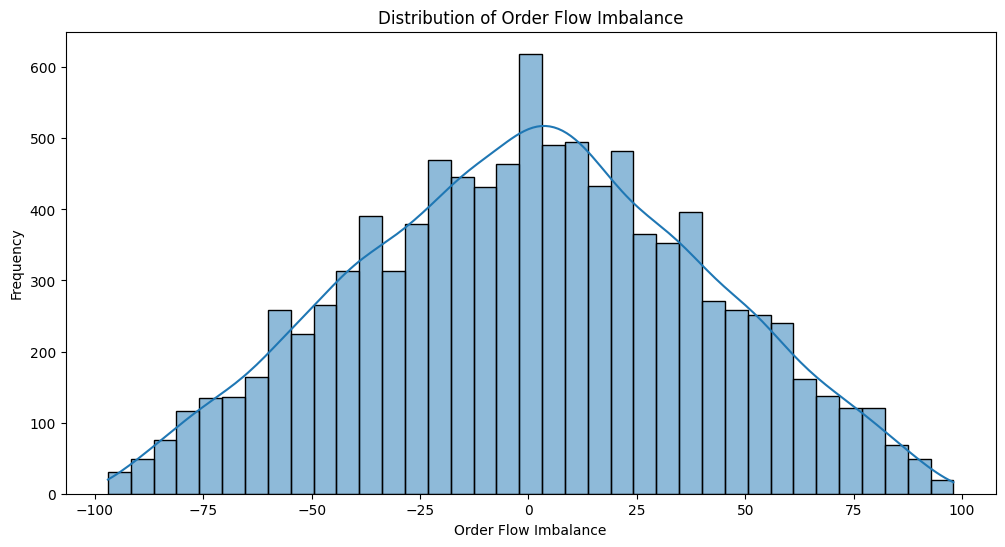

In [10]:
#explorary data analysis (EDA)
# Plot Bid-Ask Spread
plt.figure(figsize=(12, 6))
plt.plot(data['timestamp'], data['spread'], label='Bid-Ask Spread')
plt.title('Bid-Ask Spread Over Time')
plt.xlabel('Time')
plt.ylabel('Spread')
plt.legend()
plt.show()

# Distribution of Order Flow Imbalance
plt.figure(figsize=(12, 6))
sns.histplot(data['ofi'], kde=True)
plt.title('Distribution of Order Flow Imbalance')
plt.xlabel('Order Flow Imbalance')
plt.ylabel('Frequency')
plt.show()


Price Impact Coefficient: -3.08949917225721e-05


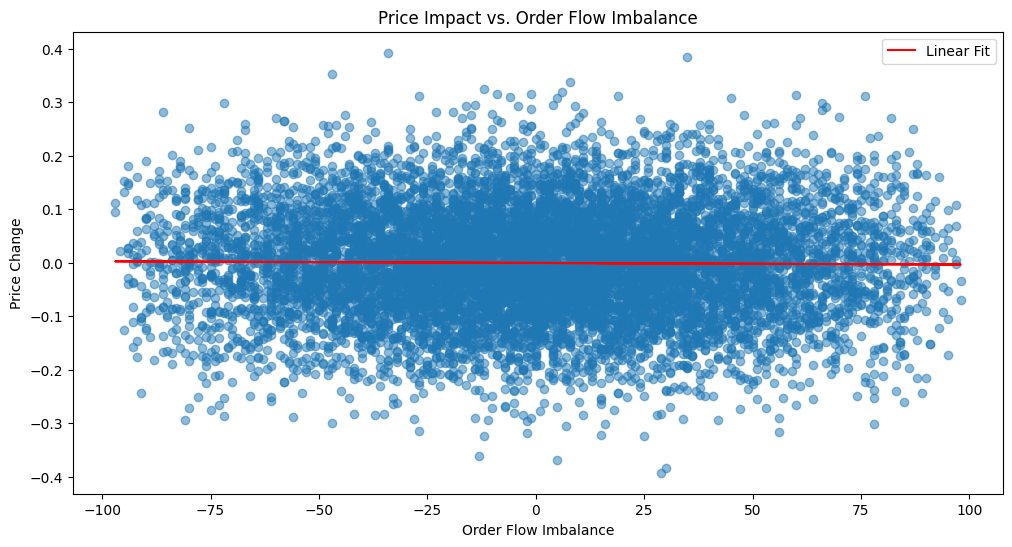

In [12]:
#price imapct model
# Calculate Price Impact: Next price change vs. current OFI
data['price_change'] = data['mid_price'].diff().shift(-1)
data.dropna(inplace=True)

# Linear Regression for Price Impact
from sklearn.linear_model import LinearRegression

X = data[['ofi']]
y = data['price_change']

model = LinearRegression()
model.fit(X, y)

# Price Impact Coefficient
print(f"Price Impact Coefficient: {model.coef_[0]}")

# Plot Price Impact
plt.figure(figsize=(12, 6))
plt.scatter(data['ofi'], data['price_change'], alpha=0.5)
plt.plot(data['ofi'], model.predict(X), color='red', label='Linear Fit')
plt.title('Price Impact vs. Order Flow Imbalance')
plt.xlabel('Order Flow Imbalance')
plt.ylabel('Price Change')
plt.legend()
plt.show()


Autocorrelation of returns: -0.014409428001503835


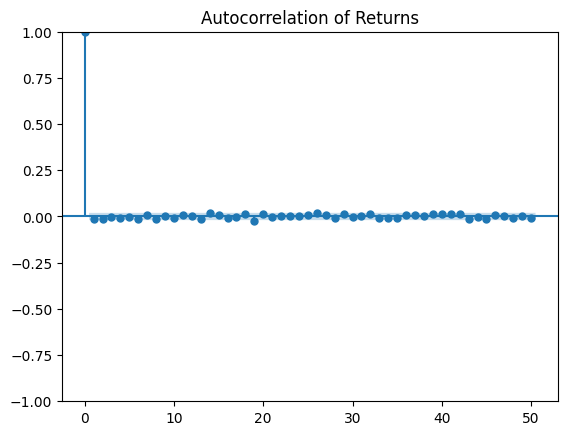

In [13]:
#market efficienct analysis
# Autocorrelation of returns to test market efficiency
data['returns'] = data['mid_price'].pct_change()
autocorrelation = data['returns'].autocorr(lag=1)

print(f"Autocorrelation of returns: {autocorrelation}")

# Plot autocorrelation
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data['returns'].dropna(), lags=50)
plt.title('Autocorrelation of Returns')
plt.show()


Amihud Illiquidity Ratio: 3.955754472597666e-05


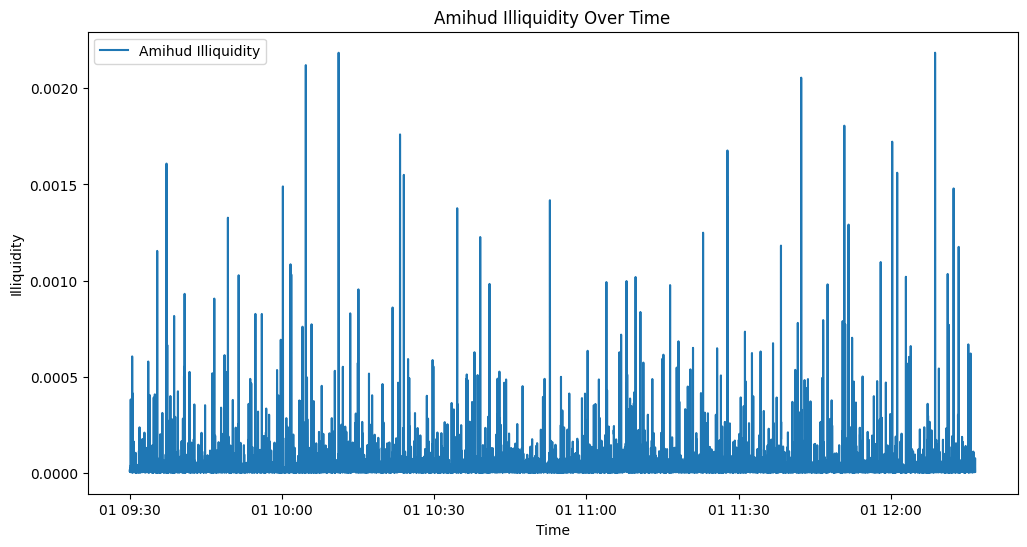

In [14]:
#liquididty analysis
# Calculate Amihud Illiquidity Ratio
data['abs_returns'] = np.abs(data['returns'])
amihud_ratio = (data['abs_returns'] / data['volume']).mean()

print(f"Amihud Illiquidity Ratio: {amihud_ratio}")

# Visualize Liquidity Over Time
plt.figure(figsize=(12, 6))
plt.plot(data['timestamp'], data['abs_returns'] / data['volume'], label='Amihud Illiquidity')
plt.title('Amihud Illiquidity Over Time')
plt.xlabel('Time')
plt.ylabel('Illiquidity')
plt.legend()
plt.show()


C:\Users\vssd9\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vssd9\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vssd9\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vssd9\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\vssd9\AppData\Local

ARIMA Model MSE: 2.7141588631947586


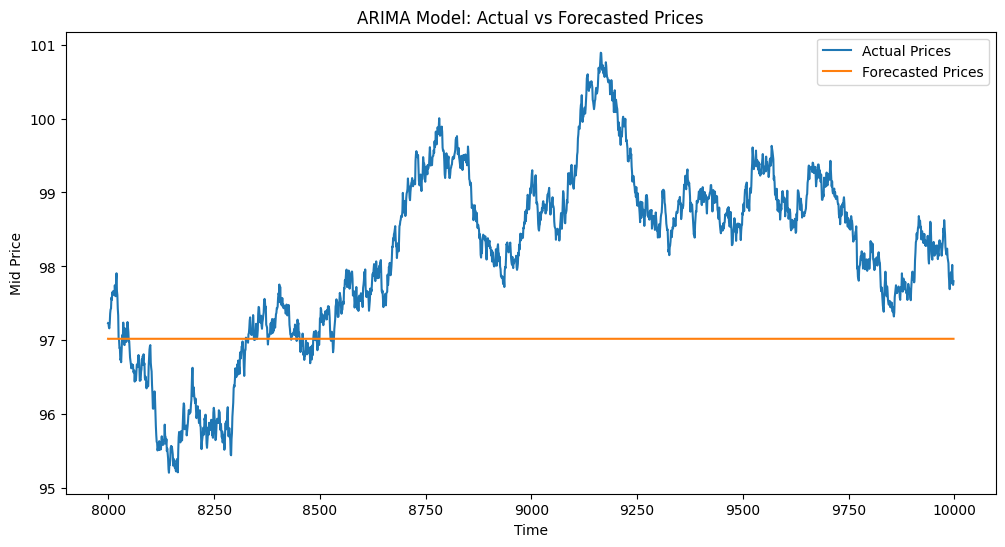

In [15]:
#Arima model for price prediction
# ARIMA model on mid-price for forecasting
train_size = int(len(data) * 0.8)
train, test = data['mid_price'][:train_size], data['mid_price'][train_size:]

arima_model = ARIMA(train, order=(5, 1, 0))
arima_result = arima_model.fit()

# Forecasting
forecast = arima_result.forecast(steps=len(test))

# Calculate MSE for ARIMA model
arima_mse = mean_squared_error(test, forecast)
print(f'ARIMA Model MSE: {arima_mse}')

# Plot Actual vs Forecasted Prices
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual Prices')
plt.plot(test.index, forecast, label='Forecasted Prices')
plt.title('ARIMA Model: Actual vs Forecasted Prices')
plt.xlabel('Time')
plt.ylabel('Mid Price')
plt.legend()
plt.show()


Random Forest Model MSE: 0.011710254588056973


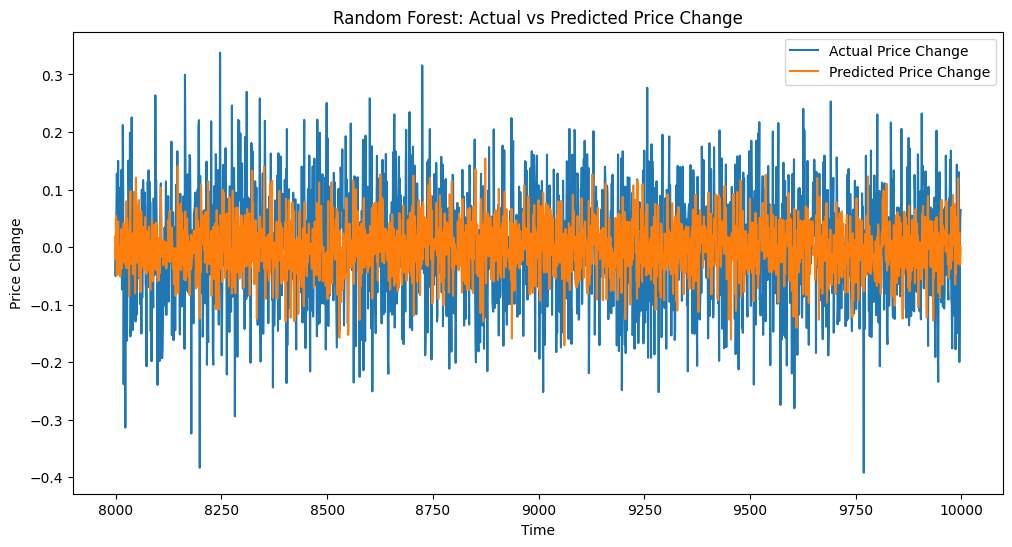

In [16]:
#random forest model
# Prepare data for Random Forest
X = data[['spread', 'ofi']]
y = data['price_change']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Calculate MSE for Random Forest model
rf_mse = mean_squared_error(y_test, y_pred)
print(f'Random Forest Model MSE: {rf_mse}')

# Plot Actual vs Predicted Price Changes
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Price Change')
plt.plot(y_test.index, y_pred, label='Predicted Price Change')
plt.title('Random Forest: Actual vs Predicted Price Change')
plt.xlabel('Time')
plt.ylabel('Price Change')
plt.legend()
plt.show()
